In [52]:
# import data
import pandas as pd

file_path = 'mlb_games_stats.csv'
df = pd.read_csv(file_path)
df


,date,home_team,away_team,home_score,away_score,result_home,result_away,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
0,2025-03-18,Chicago Cubs,Los Angeles Dodgers,1,4,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2025-03-19,Chicago Cubs,Los Angeles Dodgers,3,6,0,1,0.000000,1.000000,0.290000,3.000000,1.667000,0.622000,1.000000,0.444000
2,2025-03-27,Seattle Mariners,Athletics,4,2,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2025-03-27,Arizona Diamondbacks,Chicago Cubs,6,10,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2025-03-27,Los Angeles Dodgers,Detroit Tigers,5,4,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2025-07-25,Baltimore Orioles,Colorado Rockies,5,6,0,1,0.468085,0.240000,0.731234,5.134043,1.409447,0.587220,5.127100,1.487200
1556,2025-07-25,Milwaukee Brewers,Miami Marlins,1,5,0,1,0.660000,0.500000,0.665400,3.073260,1.145280,0.717167,5.159313,1.416583
1557,2025-07-25,Detroit Tigers,Toronto Blue Jays,2,6,0,1,0.627451,0.489796,0.751588,3.633863,1.187569,0.668082,4.300041,1.304224
1558,2025-07-26,New York Yankees,Philadelphia Phillies,4,9,0,1,0.600000,0.509804,0.774180,3.669880,1.200260,0.671863,3.436725,1.256725


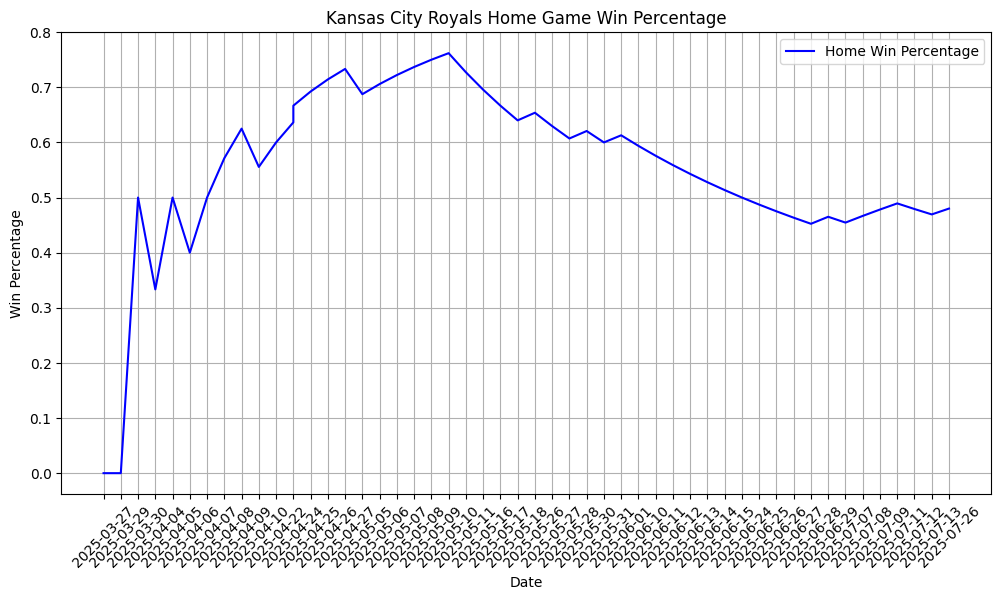

In [55]:
#line plot of the home game win percentage for Kansas City Royals
import matplotlib.pyplot as plt

royals_home = df[df['home_team'] == 'Kansas City Royals']

x=royals_home['date']
y=royals_home['home_win_pct']

#plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='blue', label='Home Win Percentage')
plt.title('Kansas City Royals Home Game Win Percentage')
plt.xlabel('Date')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


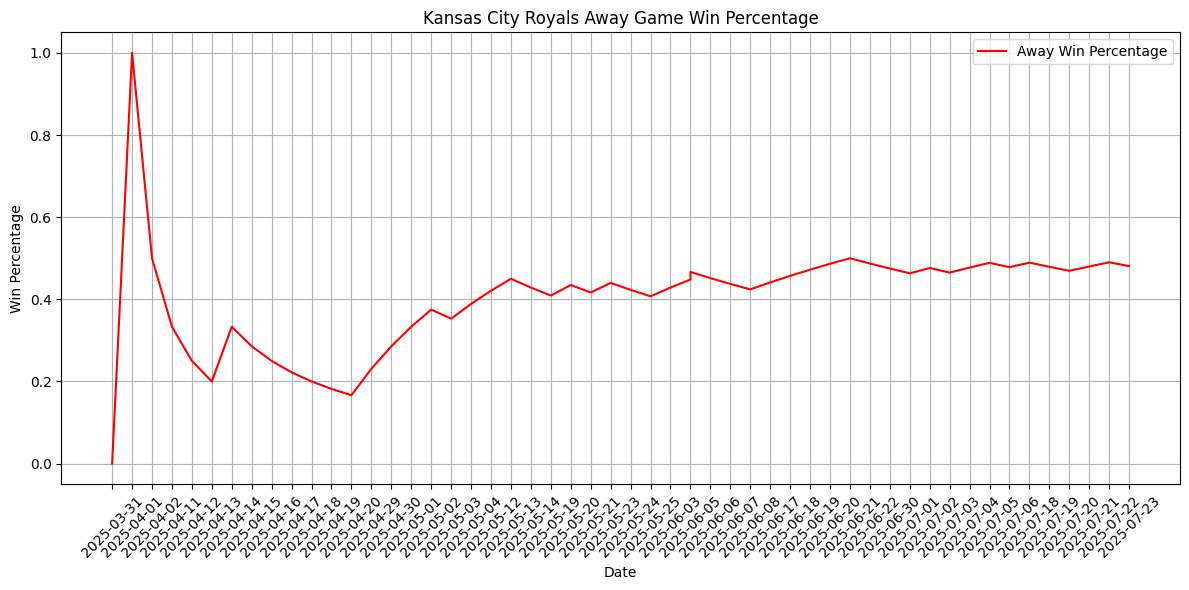

In [56]:
#line plot of the away game win percentage for Kansas City Royals
royals_away = df[df['away_team'] == 'Kansas City Royals'].copy()

x= royals_away['date']
y= royals_away['away_win_pct']
#plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='red', label='Away Win Percentage')
plt.title('Kansas City Royals Away Game Win Percentage')
plt.xlabel('Date')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()  

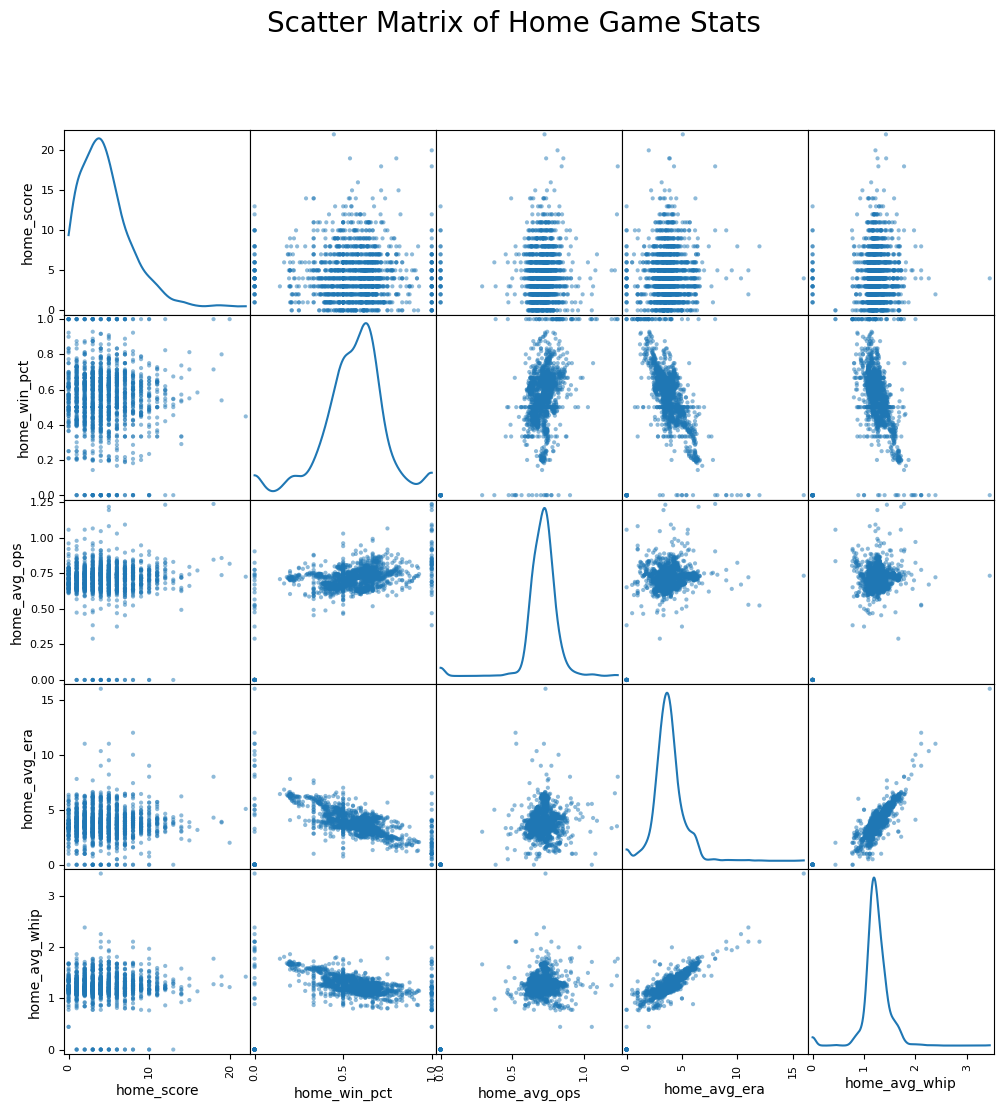

In [49]:
# scatter matrix of the home stats data
from pandas.plotting import scatter_matrix      

home_stats = df.drop(columns=['date', 'away_team', 'away_score', 'away_win_pct', 'away_avg_ops','away_avg_era','away_avg_whip', 'result_away','result_home'], axis=1)

scatter_matrix(home_stats, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Home Game Stats', fontsize=20)
plt.show()


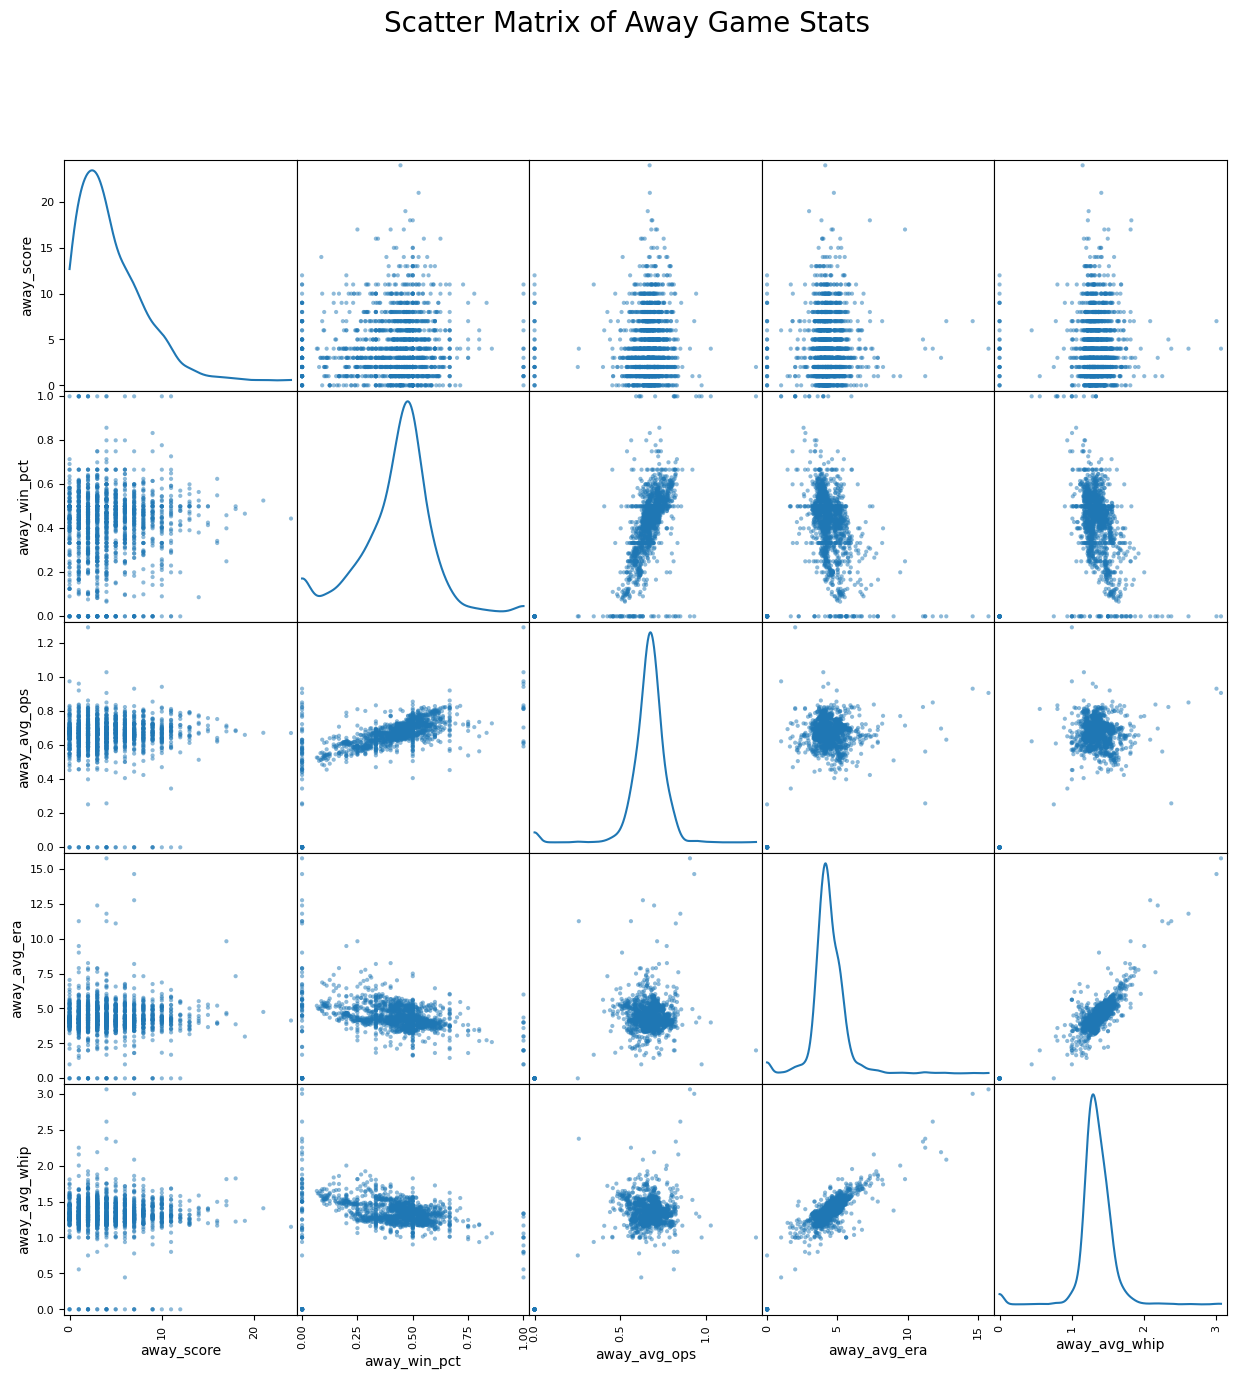

In [85]:
# scatter matrix of the away stats data
away_stats = df.drop(columns=['date', 'home_team', 'home_score', 'home_win_pct', 'home_avg_ops','home_avg_era','home_avg_whip', 'result_away','result_home'], axis=1)
scatter_matrix(away_stats, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix of Away Game Stats', fontsize=20)
plt.show()   

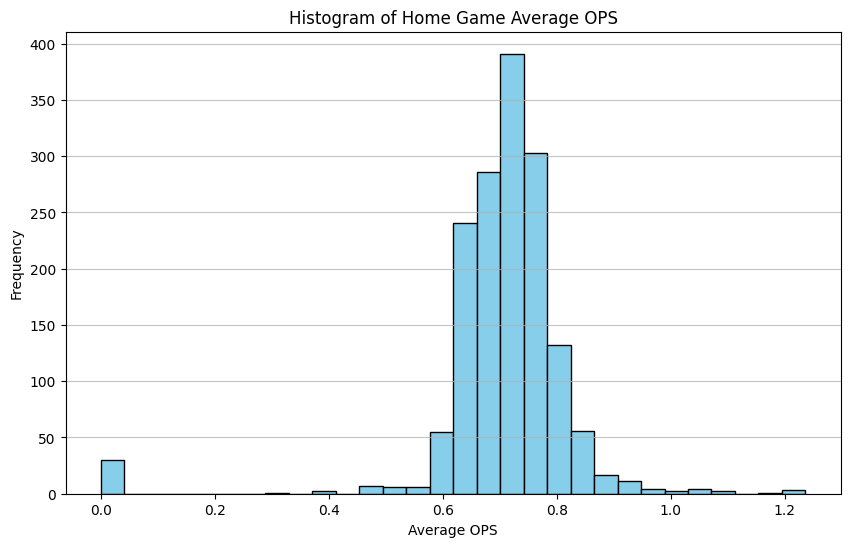

In [83]:
#histogram for home game average OPS
plt.figure(figsize=(10, 6))
plt.hist(df['home_avg_ops'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Home Game Average OPS')
plt.xlabel('Average OPS')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()  

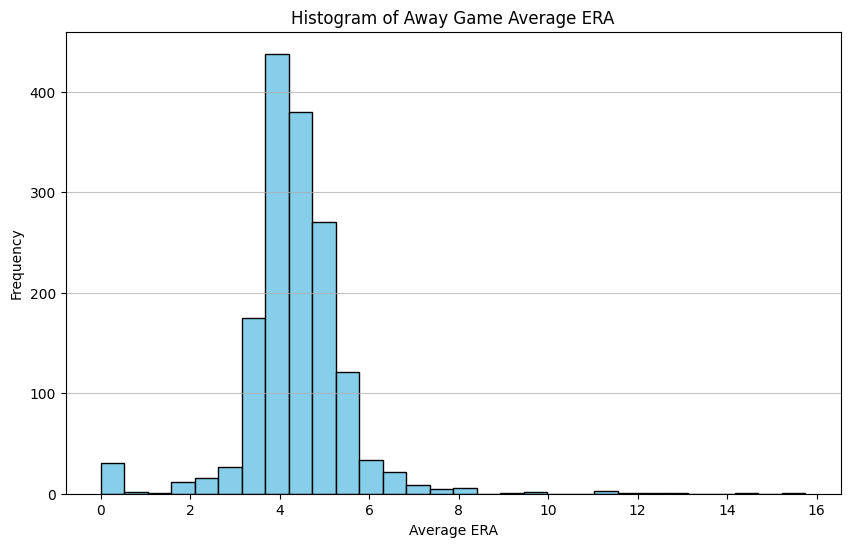

In [91]:
#histogram for away games average era 
plt.figure(figsize=(10, 6))
plt.hist(df['away_avg_era'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Away Game Average ERA')
plt.xlabel('Average ERA')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show() 

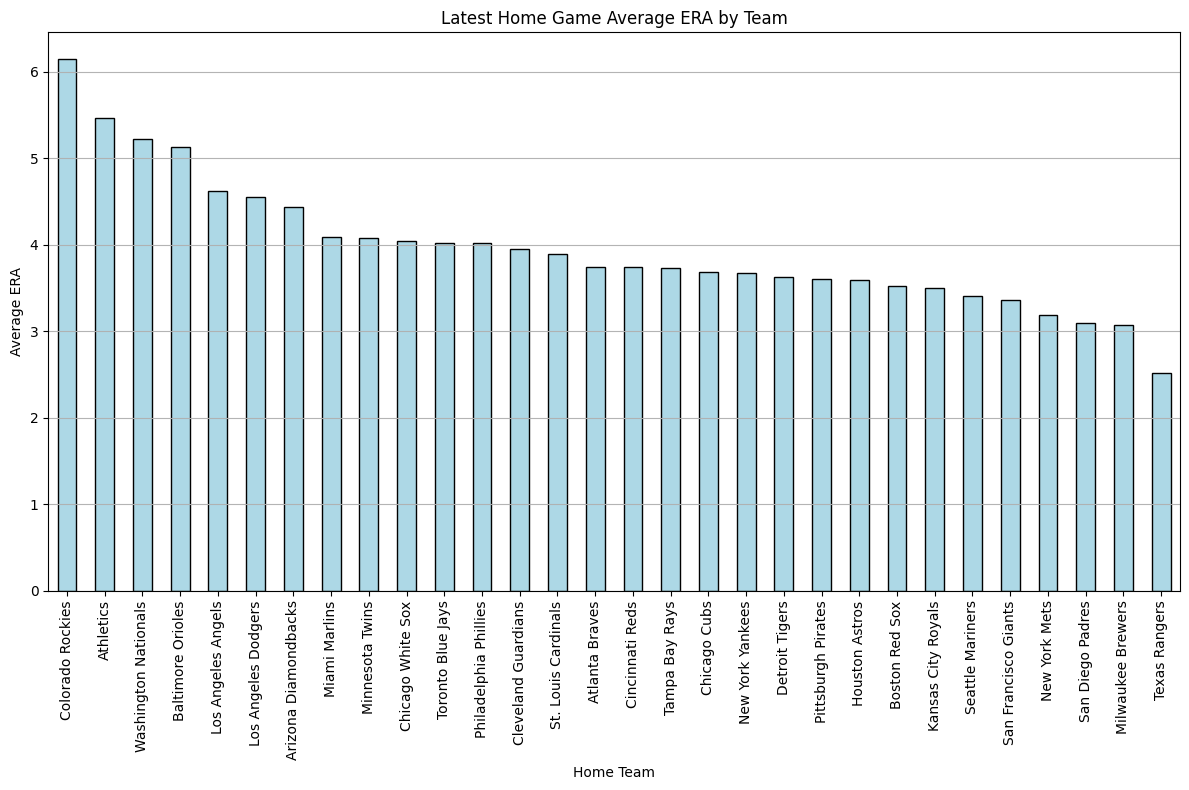

In [81]:
# bar chart of latest home game average ERA from each team
latest_home_era = df.groupby('home_team')['home_avg_era'].last().sort_values(ascending=False)
plt.figure(figsize=(12, 8))         
latest_home_era.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Latest Home Game Average ERA by Team')
plt.xlabel('Home Team')
plt.ylabel('Average ERA')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.95)
plt.tight_layout()
plt.show()


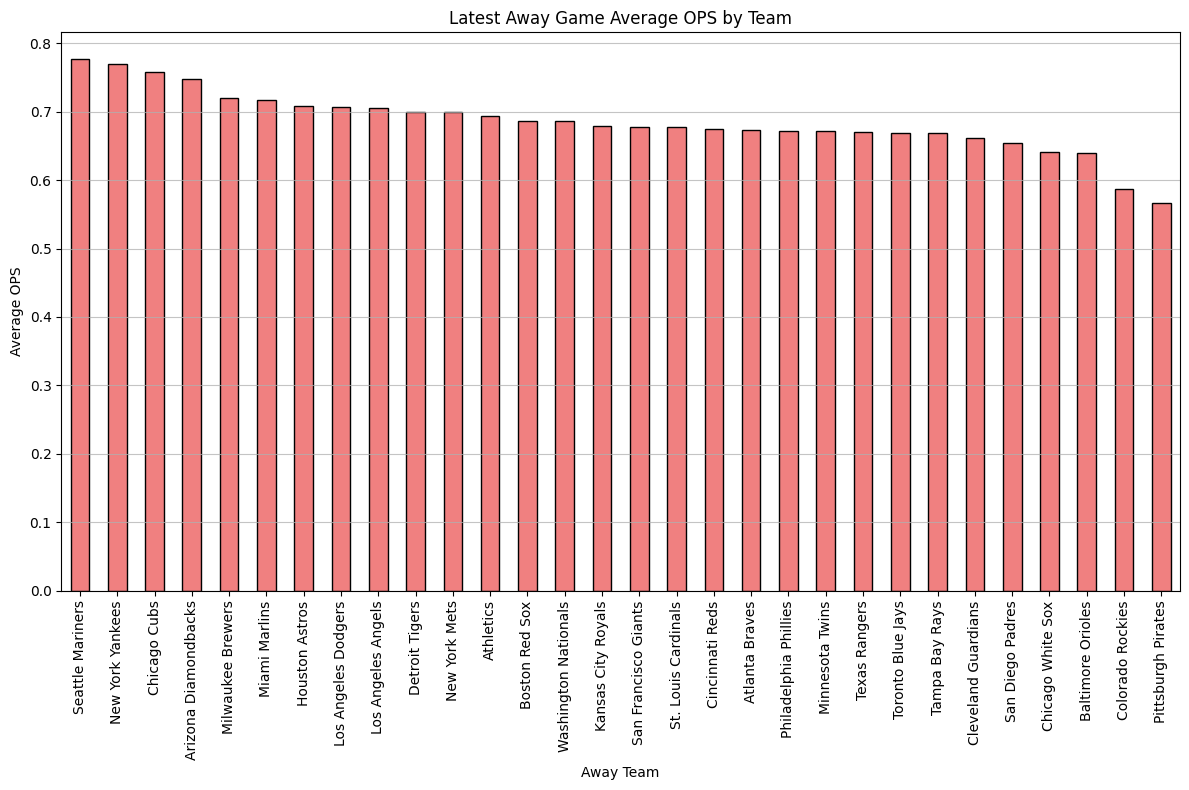

In [89]:
# latest away game average OPS from each team
latest_away_ops = df.groupby('away_team')['away_avg_ops'].last().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
latest_away_ops.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Latest Away Game Average OPS by Team')
plt.xlabel('Away Team')
plt.ylabel('Average OPS')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


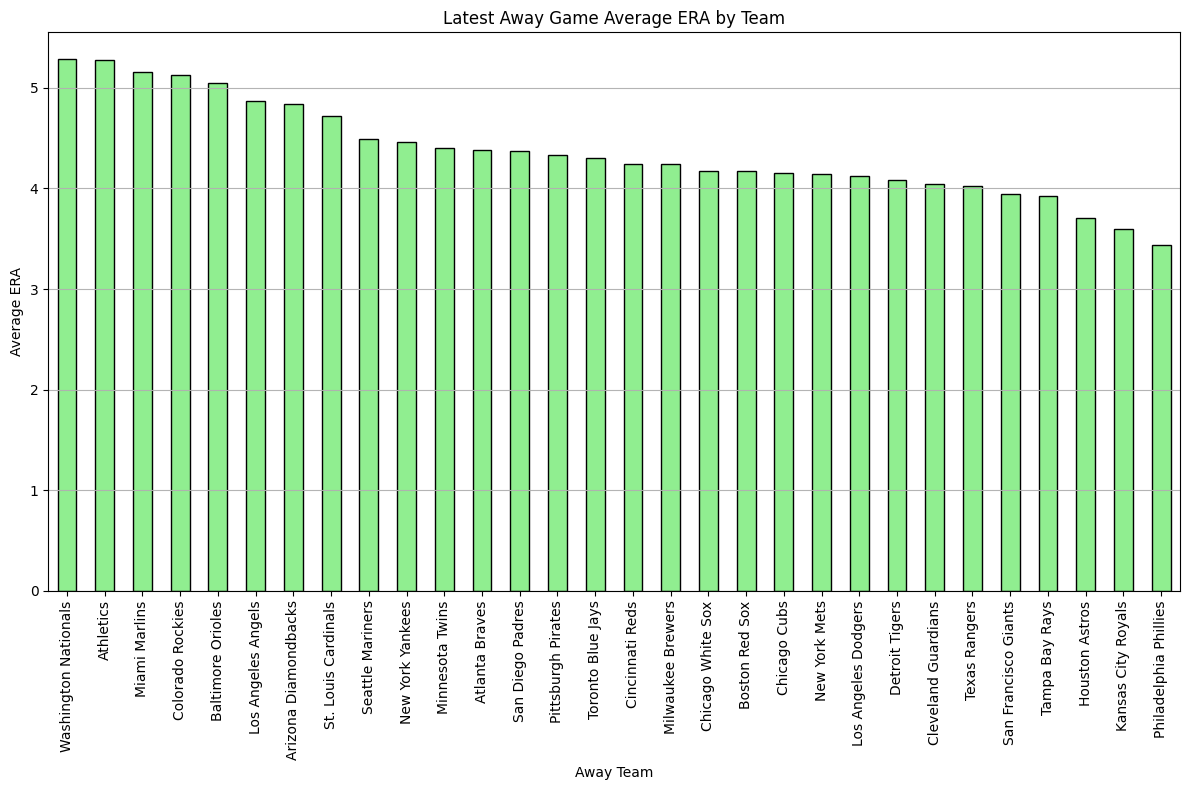

In [90]:
#latest away game average ERA from each team
latest_away_era = df.groupby('away_team')['away_avg_era'].last().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
latest_away_era.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Latest Away Game Average ERA by Team')
plt.xlabel('Away Team')
plt.ylabel('Average ERA')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.95)
plt.tight_layout()
plt.show()
